# Multi-layer Perceptron Model

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Building the multi-layer perceptron model

In [4]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [5]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Fit the model to built a prediction for x test
multilayer_perceptron = MLPRegressor(random_state = 1, max_iter = 500)
multilayer_perceptron.fit(x_train, y_train)
multilayer_perceptron_pred = multilayer_perceptron.predict(x_test)

## Step 4: Check for scores

In [7]:
# Check for the score of the prediction
multilayer_perceptron_score = multilayer_perceptron.score(x_train, y_train)
print('Multilayer Perceptron Regression Model Score: ', round(multilayer_perceptron_score, 3))

# R squared value
r2 = r2_score(y_test, multilayer_perceptron_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, multilayer_perceptron_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, multilayer_perceptron_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(multilayer_perceptron, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Multilayer Perceptron Regression Model Score:  0.882
R Squared:  0.868
Adjusted R Squared:  0.854
Mean Squared Error:  0.024
Root Mean Squared Error:  0.156
Mean Absolute Error:  0.111
Accuracy:  72.754 %


## Step 5: Create visuals

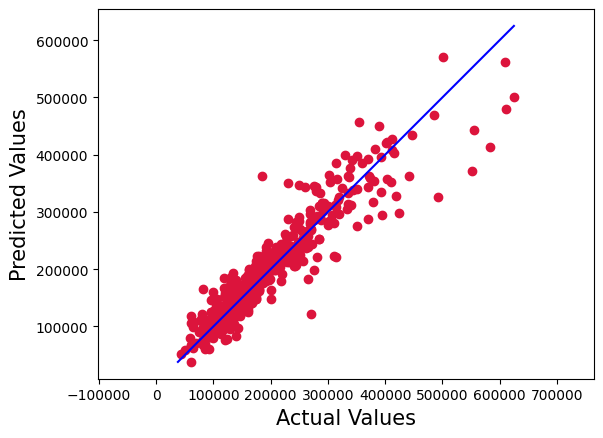

In [8]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(multilayer_perceptron_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

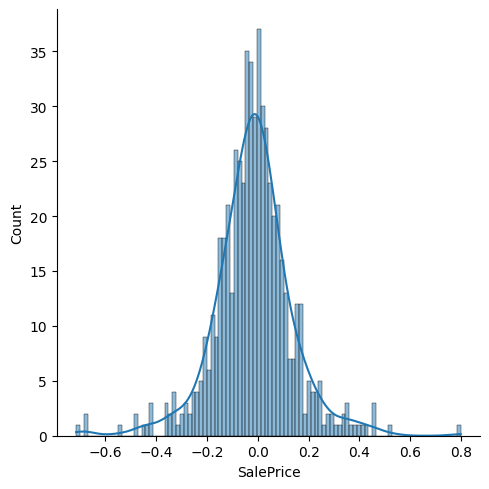

In [9]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - multilayer_perceptron_pred), bins = 100, kde = True)

## Step 6: Hyperparameter tuning (grid search)

In [10]:
# Specifies hyperparameter options
parameters = {'hidden_layer_sizes': [(1, ), (50, )], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.00005, 0.0005]}

In [11]:
# Apply grid search to find the best hyperparameter option
GS_CV_mp = GridSearchCV(estimator = multilayer_perceptron, param_grid = parameters, cv = 5, n_jobs = -1)
GS_CV_mp.fit(x_train, y_train)
GS_CV_mp.best_params_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

{'activation': 'relu',
 'alpha': 0.0005,
 'hidden_layer_sizes': (1,),
 'solver': 'adam'}

In [12]:
# Built a multi-layer perceptron model with the new hyperparameter option
# {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (1,), 'solver': 'adam'}
multilayer_perceptron_mod = MLPRegressor(random_state = 1, max_iter = 500, activation = 'relu', hidden_layer_sizes = 1,
                                         solver = 'adam', alpha = 0.0005)
multilayer_perceptron_mod.fit(x_train, y_train)
multilayer_perceptron_pred = multilayer_perceptron_mod.predict(x_test)

## Step 7: Check for scores

In [13]:
# Check for the score of the prediction
multilayer_perceptron_mod_score = multilayer_perceptron_mod.score(x_train, y_train)
print('Multilayer Perceptron Regression Model Score: ', round(multilayer_perceptron_mod_score, 3))

# R squared value
r2 = r2_score(y_test, multilayer_perceptron_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, multilayer_perceptron_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, multilayer_perceptron_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(multilayer_perceptron_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Multilayer Perceptron Regression Model Score:  0.863
R Squared:  0.865
Adjusted R Squared:  0.851
Mean Squared Error:  0.025
Root Mean Squared Error:  0.158
Mean Absolute Error:  0.119
Accuracy:  82.989 %


## Step 8: Create visuals

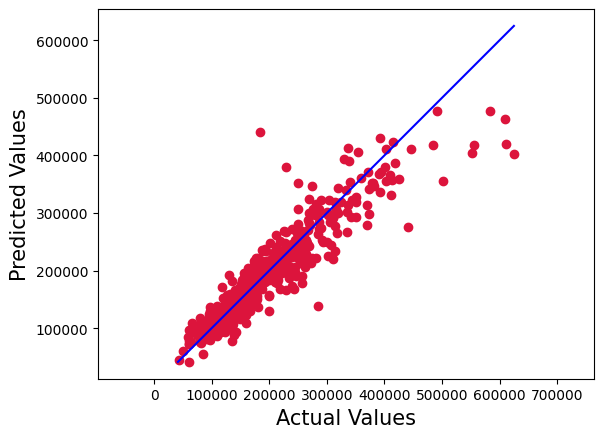

In [14]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(multilayer_perceptron_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

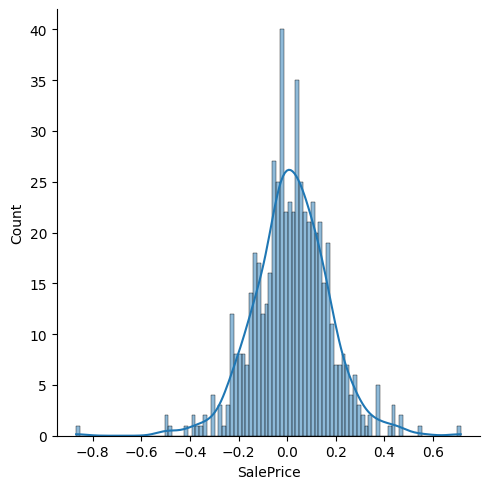

In [15]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - multilayer_perceptron_pred), bins = 100, kde = True)